In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
sales = pd.read_csv("../data/historical_sales.csv", sep=None, engine='python')
products = pd.read_csv("../data/products.csv", sep=None, engine='python')

In [23]:
print("Sales columns:", sales.columns.tolist())
print("Products columns:", products.columns.tolist())

Sales columns: ['sale_id', 'store_id', 'product_id', 'sale_date', 'quantity', 'price']
Products columns: ['product_id', 'product_name', 'category']


In [24]:
# Strip spaties en hoofdletters
sales.columns = sales.columns.str.strip().str.lower()
products.columns = products.columns.str.strip().str.lower()


In [25]:
sales['sale_date'] = pd.to_datetime(sales['sale_date'], dayfirst=True)

In [26]:
df = sales.merge(products, on="product_id", how="left")
print(df.head())

   sale_id  store_id  product_id  sale_date  quantity  price   product_name  \
0        1       101         201 2025-01-05         3   10.5  Chocolate Bar   
1        2       101         202 2025-01-05         1   25.0     Soda 500ml   
2        3       102         201 2025-01-06         2   10.5  Chocolate Bar   
3        4       103         203 2025-01-07         5    7.0     Bread Loaf   

  category  
0   Snacks  
1   Drinks  
2   Snacks  
3   Bakery  


In [27]:
# Basisstatistieken
print(df.describe())
print(df.info())

        sale_id    store_id  product_id            sale_date  quantity  \
count  4.000000    4.000000    4.000000                    4  4.000000   
mean   2.500000  101.750000  201.750000  2025-01-05 18:00:00  2.750000   
min    1.000000  101.000000  201.000000  2025-01-05 00:00:00  1.000000   
25%    1.750000  101.000000  201.000000  2025-01-05 00:00:00  1.750000   
50%    2.500000  101.500000  201.500000  2025-01-05 12:00:00  2.500000   
75%    3.250000  102.250000  202.250000  2025-01-06 06:00:00  3.500000   
max    4.000000  103.000000  203.000000  2025-01-07 00:00:00  5.000000   
std    1.290994    0.957427    0.957427                  NaN  1.707825   

           price  
count   4.000000  
mean   13.250000  
min     7.000000  
25%     9.625000  
50%    10.500000  
75%    14.125000  
max    25.000000  
std     8.005207  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------ 

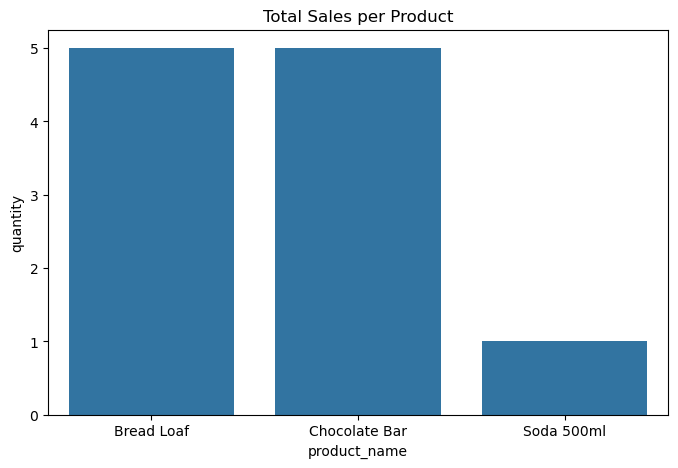

In [28]:
# Verkoop per product
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('product_name')['quantity'].sum().reset_index(),
            x='product_name', y='quantity')
plt.title("Total Sales per Product")
plt.show()

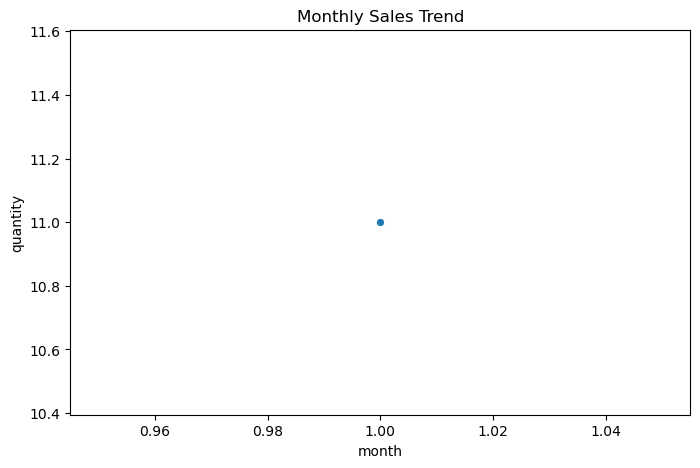

In [29]:
# Verkoop per maand
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['month'] = df['sale_date'].dt.month
monthly_sales = df.groupby('month')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x='month', y='quantity', marker='o')
plt.title("Monthly Sales Trend")
plt.show()


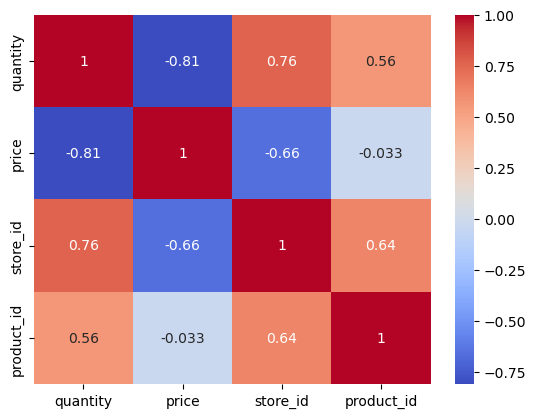

In [30]:
# Correlatie heatmap
corr = df[['quantity','price','store_id','product_id']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()